# <font face="gotham" color="Green">  Prototyping with Deep Learning  </font>

In [12]:
import pandas as pd


In [13]:


df=pd.read_csv('yelp.csv')
df.head(5)

,Unnamed: 0,sentence,label,source
0,0,Wow... Loved this place.,1,yelp
1,1,Crust is not good.,0,yelp
2,2,Not tasty and the texture was just nasty.,0,yelp
3,3,Stopped by during the late May bank holiday of...,1,yelp
4,4,The selection on the menu was great and so wer...,1,yelp


In [14]:
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,sentence,label,source
0,Wow... Loved this place.,1,yelp
1,Crust is not good.,0,yelp
2,Not tasty and the texture was just nasty.,0,yelp
3,Stopped by during the late May bank holiday of...,1,yelp
4,The selection on the menu was great and so wer...,1,yelp
...,...,...,...
995,I think food should have flavor and texture an...,0,yelp
996,Appetite instantly gone.,0,yelp
997,Overall I was not impressed and would not go b...,0,yelp
998,"The whole experience was underwhelming, and I ...",0,yelp


In [15]:
x=df['sentence']
y=df['label']

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [17]:
print("shape of X_train: ",X_train.shape)
print("shape of X_test: ",X_test.shape)

print("shape of y_train: ",y_train.shape)
print("shape of y_test: ",y_test.shape)

shape of X_train:  (800,)
shape of X_test:  (200,)
shape of y_train:  (800,)
shape of y_test:  (200,)


In [18]:
print(X_train[6]) 
print(y_train[6])

Honeslty it didn't taste THAT fresh.)
0


In [19]:
# we will use the Tokenizer class : create a word-to-index dictionary. In the word-to-index dictionary,
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=1000,lower=True)
tokenizer.fit_on_texts(X_train)



X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1


In [20]:
print(X_train[6]) 
print(y_train[6])

[24, 77, 28, 102, 30]
0


In [21]:
len(X_train[15])

6

In [22]:
len(X_train[1])

5

## check the distri. of sequence length

In [26]:
sequence_length = []
for seq in X_train:
    length = len(seq)
    sequence_length.append(length)

In [27]:
for seq in X_test:
    length = len(seq)
    sequence_length.append(length)

In [28]:
len(sequence_length)

1000

In [29]:
df['sequence_length'] = sequence_length

array([[<AxesSubplot:title={'center':'sequence_length'}>]], dtype=object)

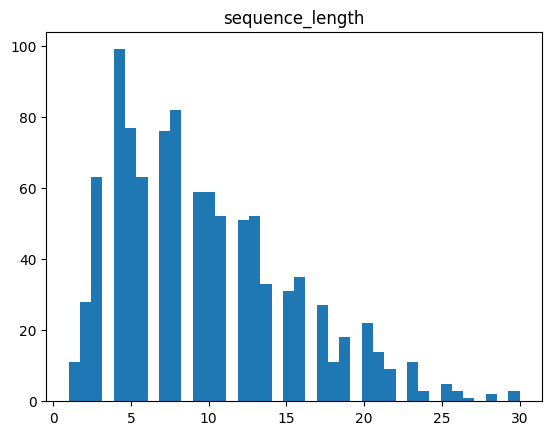

In [32]:
df.hist(column='sequence_length', bins=40, grid = False)

In [33]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100  #We set the maximum size of each list to 100.


X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

print(X_train[3, :])  #the resulting feature vector contains mostly zeros, since you have a fairly short sentence.

[  8   4   5 495 496 113   1 369   1 101 370  29 163 249   2 211 761 121
  46 121 762   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0]


In [43]:
#from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical

num_classes = 2

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print(y_train.shape)
print(y_train[0])
#print(len(y_train[0]))

(800, 2)
[0. 1.]


In [75]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,SimpleRNN, LSTM, GRU,Dropout
from keras import optimizers
from keras.preprocessing.sequence import pad_sequences
import numpy as np
#import numpy as np

#(samples, timesteps, features)
#(batch_size, timesteps, input_dim)
X_train = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape)  #(750, 100, 1)

X_test = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(800, 100, 1)
(200, 100, 1)


In [76]:

num_classes=2

def vanilla_rnn():
    model = Sequential()
    #model.add(SimpleRNN(50, input_shape = (X_train.shape[1], X_train.shape[2],), return_sequences = False))
    model.add(SimpleRNN(50, input_shape = (maxlen,1), return_sequences = False))
    #model.add(tf.keras.layers.Dropout(0.25))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    model.summary()
    
    adam = tf.keras.optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model

In [77]:
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf 

model = KerasClassifier(build_fn = vanilla_rnn, epochs = 4, batch_size = 50)
model.fit(X_train, y_train)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 50)                2600      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_12 (Dense)            (None, 2)                 102       
                                                                 
 activation_12 (Activation)  (None, 2)                 0         
                                                                 
Total params: 2,702
Trainable params: 2,702
Non-trainable params: 0
_________________________________________________________________
Epoch 1/4


/var/folders/kg/1gd77wh94h7bl509mcznwpk09w5xmw/T/ipykernel_36445/1635299553.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn = vanilla_rnn, epochs = 4, batch_size = 50)
/Users/bereket.yilma/pytorch-test/env/lib/python3.8/site-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


16/16 [==============================] - 0s 6ms/step - loss: 0.6987 - accuracy: 0.5075
Epoch 2/4
16/16 [==============================] - 0s 6ms/step - loss: 0.7017 - accuracy: 0.5263
Epoch 3/4
16/16 [==============================] - 0s 6ms/step - loss: 0.6985 - accuracy: 0.5213
Epoch 4/4
16/16 [==============================] - 0s 6ms/step - loss: 0.6978 - accuracy: 0.5113


In [73]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_test_ = np.argmax(y_test, axis = 1)

print(accuracy_score(y_pred, y_test_))

0.47


# Testing model on New input

In [74]:

a= ['Waitress was bad in service.']
#a = ["I love their service"]
a = tokenizer.texts_to_sequences(a)
a=np.array(a)
a = pad_sequences(a, padding='post', maxlen=maxlen)

a = a.reshape((a.shape[0], a.shape[1], 1))
print(a.shape)

prediction = model.predict(np.array(a))
print(prediction) # 0 means negative and 1 means positive


(1, 100, 1)
[0]
